In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
full_train_dataset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
full_test_dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

len(full_train_dataset), len(full_test_dataset)

(50000, 10000)

In [4]:
n_train = 1000
n_test = 200

train_dataset, _ = torch.utils.data.random_split(full_train_dataset, [n_train, len(full_train_dataset)-n_train])
test_dataset, _ = torch.utils.data.random_split(full_test_dataset, [n_test, len(full_test_dataset)-n_test])

len(train_dataset), len(test_dataset)

(1000, 200)

In [5]:
image, label = train_dataset[0]
image.shape, label

(torch.Size([3, 224, 224]), 0)

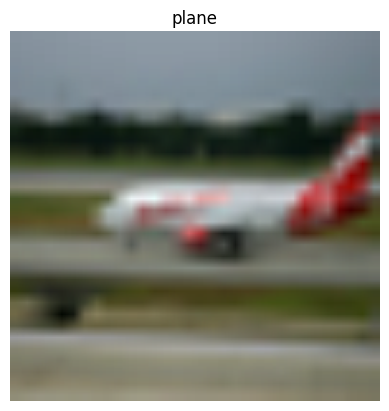

In [6]:
image_np = image.permute(1, 2, 0).cpu().numpy()
image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())  # Normalize to [0,1]
plt.imshow(image_np)
plt.axis("off")
plt.title(classes[label])
plt.show()

In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

In [8]:
model = models.mobilenet_v2(pretrained=True)

num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, len(classes))

print(model)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

/Users/khueluu/.local/share/virtualenvs/NSU_DNN-6bTKXTyC/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/khueluu/.local/share/virtualenvs/NSU_DNN-6bTKXTyC/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.01)

In [ ]:
# Fine-tune
epochs = 3

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        preds = model(images)
        loss = loss_fn(preds, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    epoch_loss = running_loss/len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

Epoch 1/3, Loss: 2.8214
Epoch 2/3, Loss: 2.3038


In [9]:
# Test
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        preds = model(images)
        _, predicted = torch.max(preds.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

KeyboardInterrupt: 

In [ ]:
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Predict
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images and predictions
imshow(torchvision.utils.make_grid(images[:4]))
print('Predicted:', ' '.join(f'{classes[predicted[j]]}' for j in range(4)))
print('Actual:', ' '.join(f'{classes[labels[j]]}' for j in range(4)))